In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('../predictions_w_abstention.csv')

In [4]:
df

,Unnamed: 0,date,ticker,label,predicted_label,reservation,correct_prediction,weighted_score,is_long
0,44164,2003-10-02,ADBE,0,0,0.003366,True,0.565707,"tensor(True, device='mps:0')"
1,47719,2003-10-02,GENZ,1,0,0.006967,False,0.517180,"tensor(True, device='mps:0')"
2,45512,2003-10-02,BPOP,1,0,0.010216,False,0.499414,"tensor(True, device='mps:0')"
3,46439,2003-10-02,CSCO,0,0,0.010114,True,0.566113,"tensor(True, device='mps:0')"
4,51975,2003-10-02,SYMC,0,1,0.014307,False,-0.517666,"tensor(False, device='mps:0')"
...,...,...,...,...,...,...,...,...,...
71256,32571,2011-03-21,MU,1,1,0.002586,True,-0.503112,"tensor(False, device='mps:0')"
71257,26554,2011-03-21,AMAT,1,0,0.003902,False,0.507900,"tensor(True, device='mps:0')"
71258,35552,2011-03-21,VMED,0,1,0.009016,False,-0.561714,"tensor(False, device='mps:0')"
71259,28147,2011-03-21,CERN,1,1,0.010250,True,-0.522255,"tensor(False, device='mps:0')"


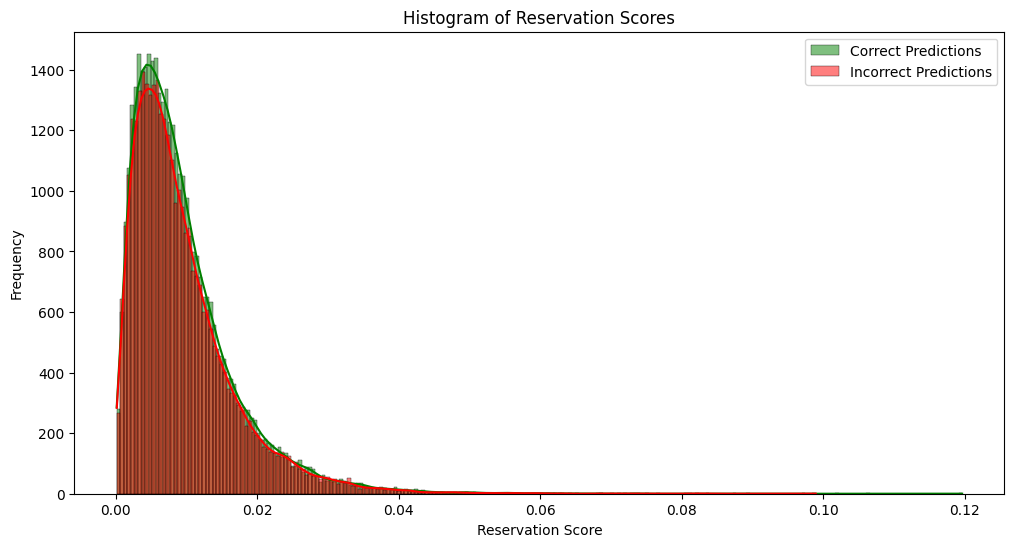

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate data into correct and incorrect predictions
correct = df[df['correct_prediction'] == True]
incorrect = df[df['correct_prediction'] == False]

plt.figure(figsize=(12, 6))
sns.histplot(correct['reservation'], color='green', label='Correct Predictions', kde=True, alpha=0.5)
sns.histplot(incorrect['reservation'], color='red', label='Incorrect Predictions', kde=True, alpha=0.5)
plt.legend()
plt.title('Histogram of Reservation Scores')
plt.xlabel('Reservation Score')
plt.ylabel('Frequency')
plt.show()


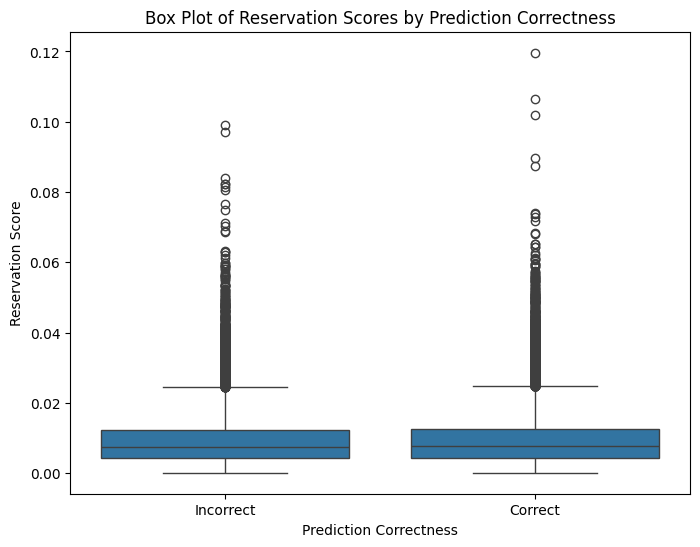

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='correct_prediction', y='reservation', data=df)
plt.title('Box Plot of Reservation Scores by Prediction Correctness')
plt.xlabel('Prediction Correctness')
plt.ylabel('Reservation Score')
plt.xticks([0, 1], ['Incorrect', 'Correct'])
plt.show()


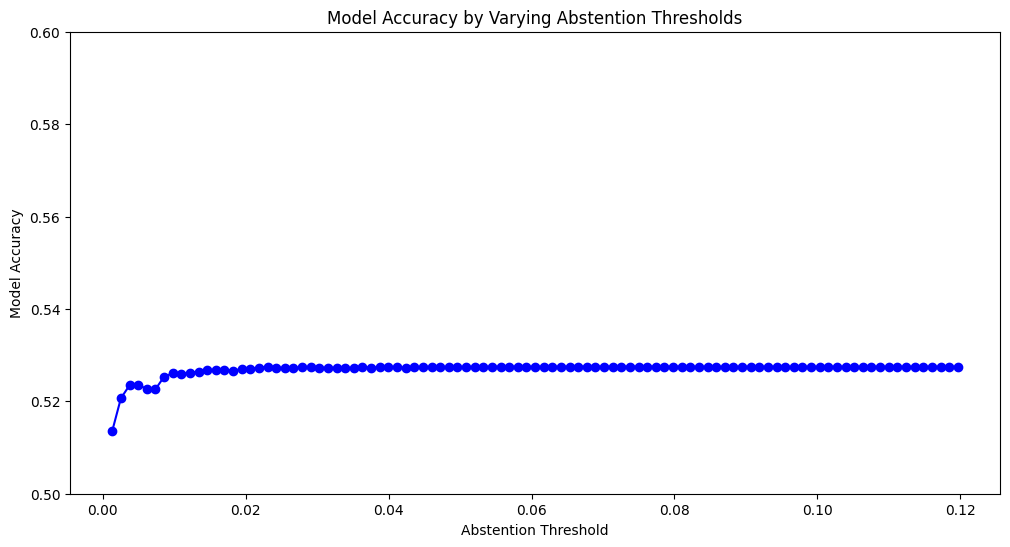

In [14]:
import numpy as np
import matplotlib.pyplot as plt

thresholds = np.linspace(df['reservation'].min(), df['reservation'].max(), 100)
accuracies = []
min_samples = 10  # Define a minimum number of samples required for a valid accuracy calculation
valid_thresholds = []  # Initialize a list to store thresholds that meet the min_samples criterion

for threshold in thresholds:
    filtered_df = df[df['reservation'] <= threshold]
    if len(filtered_df) >= min_samples:  # Ensure at least min_samples predictions
        accuracy = filtered_df['correct_prediction'].mean()
        accuracies.append(accuracy)
        valid_thresholds.append(threshold)  # Append the threshold that meets the criterion

plt.figure(figsize=(12, 6))
plt.plot(valid_thresholds, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Model Accuracy by Varying Abstention Thresholds')
plt.xlabel('Abstention Threshold')
plt.ylabel('Model Accuracy')
plt.ylim([0.5, 0.6])  # Adjust the y-axis limits to better display the plot
plt.show()



In [15]:
import pandas as pd
import numpy as np
from scipy.stats import percentileofscore

# Assuming df is your dataframe and it has columns 'reservation' and 'correct_prediction'

# Calculate the percentiles of the reservation scores
df['reservation_percentile'] = df['reservation'].apply(lambda x: percentileofscore(df['reservation'], x))

# Define the edges of the percentile groups you're interested in
percentile_edges = [0, 5, 10, 90, 95, 100]

# Initialize a dictionary to hold the accuracies for each group
accuracy_by_percentile_group = {}

# Calculate the accuracy within each percentile group
for i in range(len(percentile_edges)-1):
    lower = percentile_edges[i]
    upper = percentile_edges[i+1]
    mask = (df['reservation_percentile'] > lower) & (df['reservation_percentile'] <= upper)
    group_accuracy = df[mask]['correct_prediction'].mean()
    accuracy_by_percentile_group[f"{lower}-{upper}"] = group_accuracy

# Display the results
for percentile_group, accuracy in accuracy_by_percentile_group.items():
    print(f"Percentile group {percentile_group}: Accuracy = {accuracy:.2f}")


Percentile group 0-5: Accuracy = 0.52
Percentile group 5-10: Accuracy = 0.52
Percentile group 10-90: Accuracy = 0.53
Percentile group 90-95: Accuracy = 0.54
Percentile group 95-100: Accuracy = 0.53
